In [11]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
from scipy import optimize
dp = '/home/ebert/jupyter-notebooks/FNode-data'

In [12]:
exp_name = ''
if exp_name:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
else:
    experiment_file = ''
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
print "ivars: {}".format(q.experiments[0]['variable_list'])

name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
ivars: [u'cs_d2_read_det']


<IPython.core.display.Javascript object>


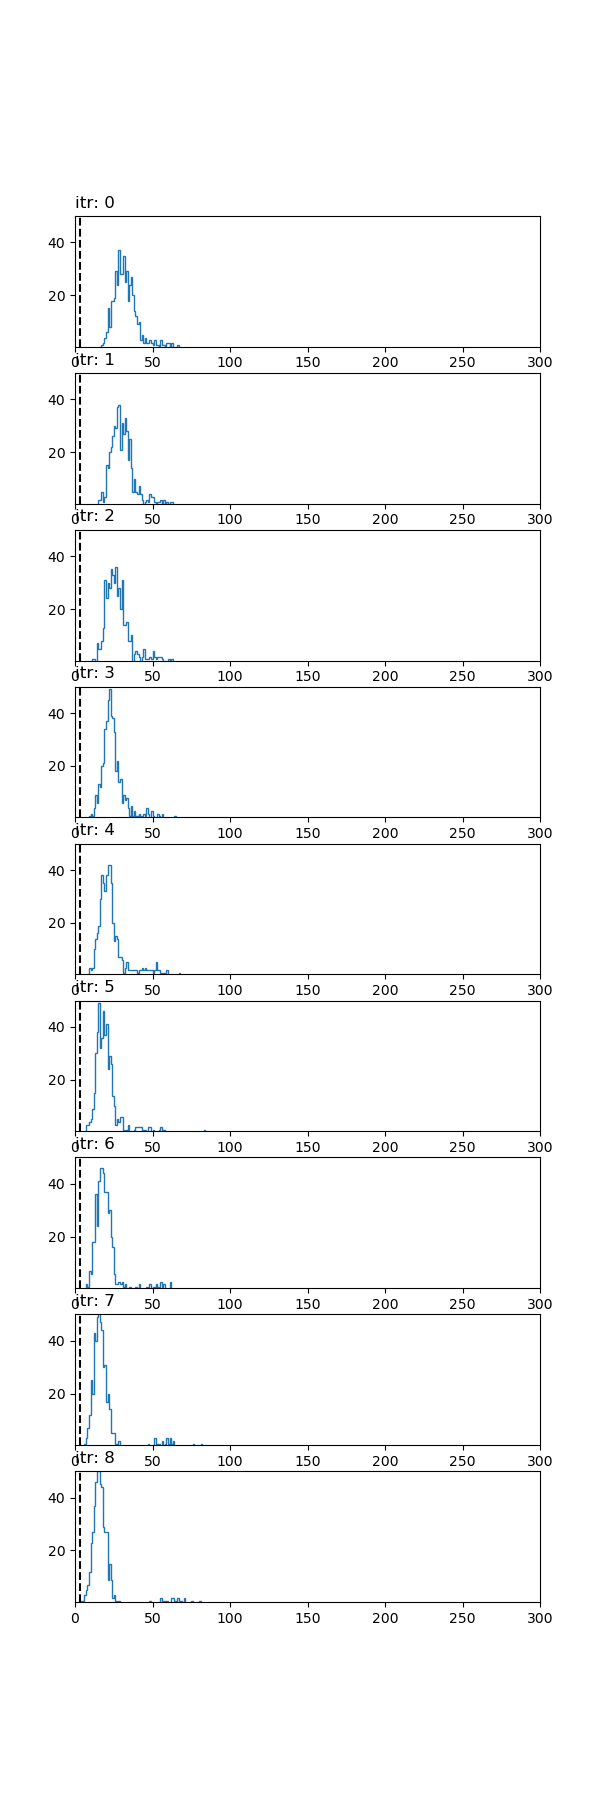

In [18]:
itrs = len(q.experiments[0]['iterations'].keys())
fig, ax = plt.subplots(itrs, figsize=(6,18))
shot = 0
roi = 0
for itr in range(itrs):
    d = q.experiments[0]['iterations'][itr]['signal_data'][:,shot,roi,0]
    ax[itr].hist(d, bins=np.arange(max(d)+1), density=False, histtype='step')
    ax[itr].axvline(x=3, color='k', linestyle='--')
#     ax[itr].set_yscale('log', nonposy='clip')
    ax[itr].set_ylim(0.5, 50)
    ax[itr].set_xlim(0,300)
    ax[itr].set_title('itr: {}'.format(itr), loc='left')

fmts = ['pdf', 'png']
fn = os.path.join(dp, q.experiments[0]['source_path'], 's0_signal_vs_offset_time.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

In [9]:
# get s0 cuts
cuts = [[32],[3]]
q.set_thresholds(cuts, roi=0)
cuts = [[37],[3]]
q.set_thresholds(cuts, roi=1)
retention = q.apply_thresholds()
itrs = len(q.experiments[0]['iterations'].keys())
s1_cuts = []
loads = []
for itr in range(itrs):
    s1_cuts.append(q.experiments[0]['iterations'][itr]['signal_data'][q.experiments[0]['iterations'][itr]['quantized_data'][:,0,0].astype('bool'),1,0])
    loads.append(float(s1_cuts[-1].shape[0])/500)

In [38]:
def exp(x, a, b, c):
    return a*np.exp(-x/b)+c

<IPython.core.display.Javascript object>


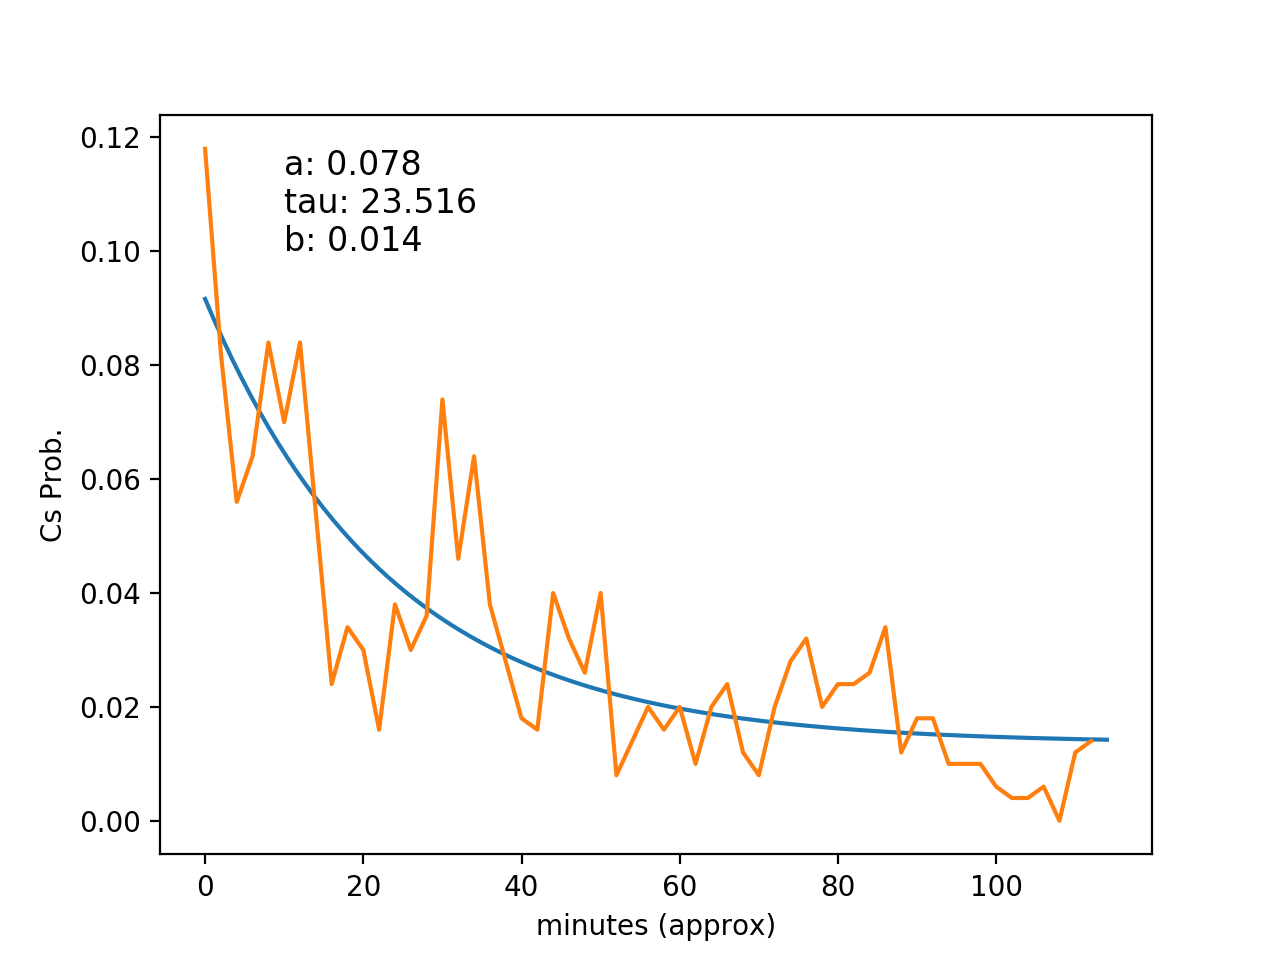

In [46]:
guess = (0.12, 20, 0)
popt, pcov = optimize.curve_fit(
    exp,
    2*np.arange(len(loads)),
    loads,
    p0=guess,
)

fig, ax = plt.subplots()
xs = np.linspace(0,2*len(loads),100)
ax.plot(xs, exp(xs, *popt))
fit_data = "a: {:.3f}\ntau: {:.3f}\nb: {:.3f}"
ax.text(10, 0.1, fit_data.format(*popt), fontsize=12)
ax.set_xlabel("minutes (approx)")
ax.set_ylabel("Cs Prob.")

ax.plot(2*np.arange(len(loads)), loads)

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'cs_loading_drop.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

<IPython.core.display.Javascript object>


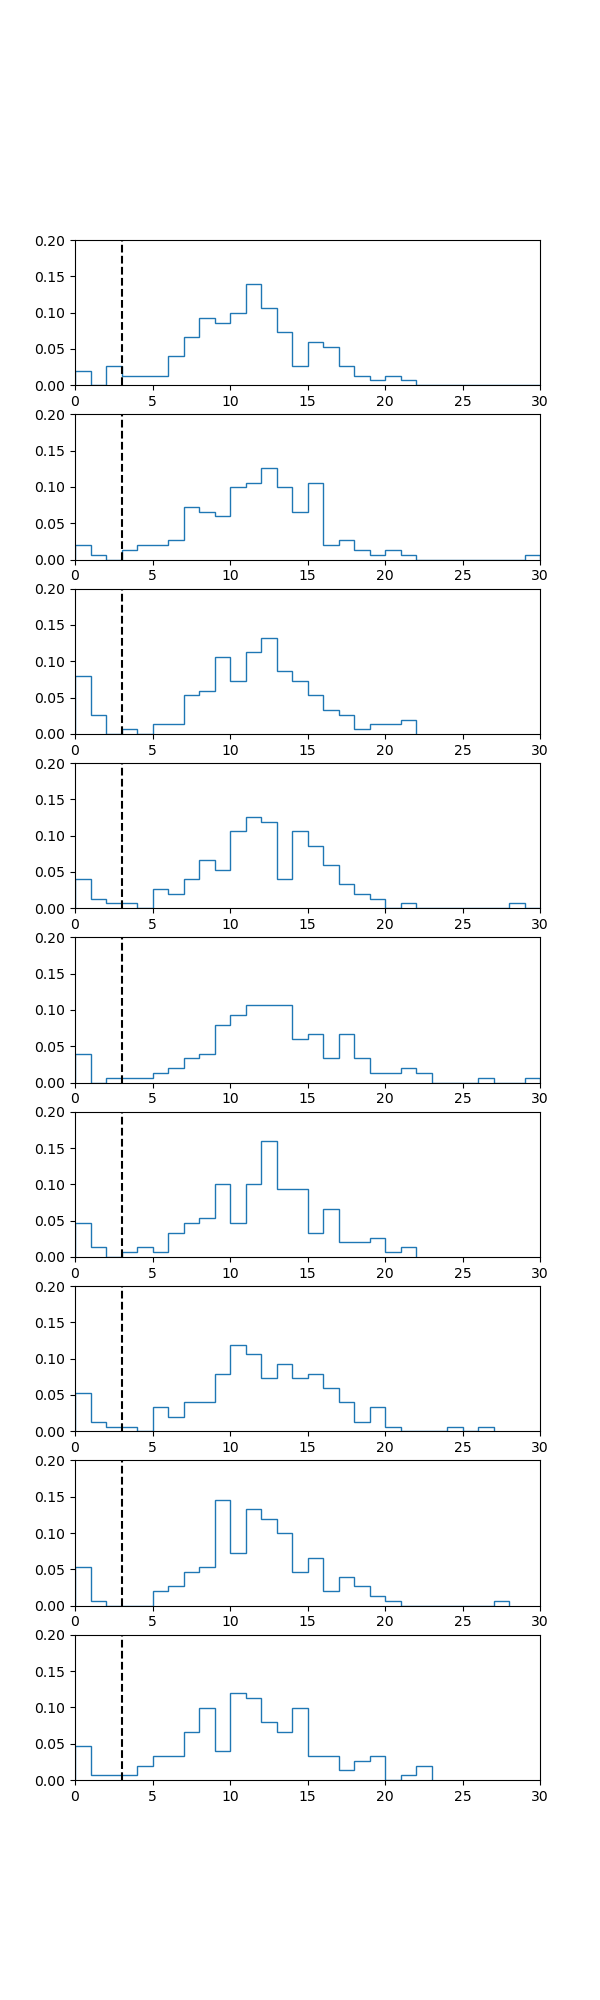

In [10]:
fig, ax = plt.subplots(itrs, figsize=(6,20))
s1_sigs = []
for itr in range(itrs):
    if len(s1_cuts[itr]):
        ax[itr].hist(s1_cuts[itr], bins=np.arange(max(s1_cuts[itr])+1), density=True, histtype='step')
        ax[itr].axvline(x=cuts[1][0], color='k', linestyle='--')
        s1_sigs.append(np.mean(s1_cuts[itr]))
        ax[itr].set_xlim(0,30)
        ax[itr].set_ylim(0,0.2)

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 's1_readout_det_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)


#s1_bg = np.mean(s1_nocut)

In [25]:
s1_sigs[3:5]

[9.0198019801980198, 8.9793814432989691]